In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
africa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).query('continent == "Africa"')
africa['has_crop_data'] = 0
# africa = africa.drop(78, axis = 0)

In [3]:
africa.loc[(africa.iso_a3 == "ZMB") | (africa.iso_a3 == "NGA") | (africa.iso_a3 == "TZA"), 'has_crop_data'] = 1

In [4]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = plt.get_cmap('viridis_r')
new_cmap = truncate_colormap(cmap, 0.5, 1)

In [5]:
mycmap = colors.ListedColormap(['darkturquoise', 'forestgreen'])

(-21.06298832501519, 54.57181563452453, -38.42762439346823, 40.95845245011106)

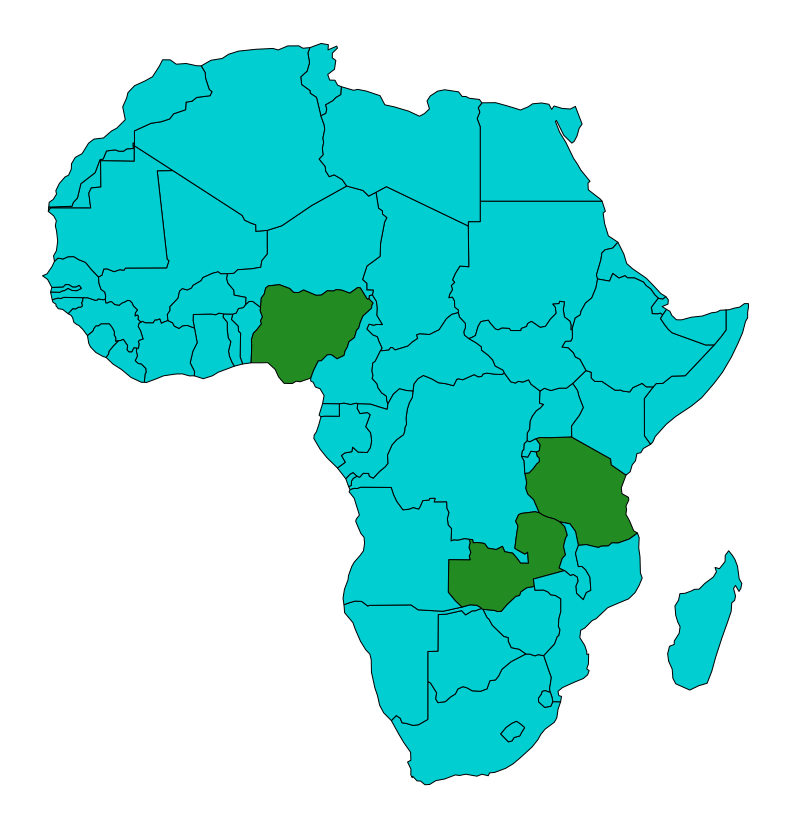

In [6]:
africa.plot(
    cmap=mycmap, # new_cmap,
    column = 'has_crop_data', 
    figsize = (15, 15),
    linewidth = 1, 
    edgecolor = 'black', 
)
plt.axis('off')